In [171]:
import numpy as np
import random
import scipy.stats as ss
import matplotlib.pyplot as plt


In [172]:
def distance(p1,p2):
    return np.sqrt(np.sum(np.power(p2-p1,2)))

def majority_votes(votes):
    vote_counts={}
    for vote in votes:
        if vote in vote_counts:
            vote_counts[vote]+=1
        else:
            vote_counts[vote]=1
    winners=[]
    max_counts=max(vote_counts.values())
    for vote,count in vote_counts.items():
        if count==max_counts:
            winners.append(vote)
            
    return random.choice(winners) #to choose one winner in case of tie     
    

In [173]:
def find_nearest_neighbours(p,points,k):
    distances=np.zeros(points.shape[0]) #same as no of rows in points
    for i in range (len(distances)):
        distances[i]=distance(p,points[i])
    ind=np.argsort(distances)
    return ind[:k] #returns the k nearest points from point 'p'.
def knn_predict(p,points,outcomes,k=5):
    ind=find_nearest_neighbours(p,points,k)
    return majority_votes(outcomes[ind])
#outcomes=np.array([0,0,0,0,1,1,1,1,1])    
#knn_predict(np.array([1.0,2.7]),points,outcomes,k=2)


In [174]:
def generate_synth_data(n=50):
    """Generating synthetic data"""
    
    points=np.concatenate((ss.norm(0,1).rvs((n,2)), ss.norm(1,1).rvs((n,2))), axis=0)
    outcomes=np.concatenate((np.repeat(0,n),np.repeat(1,n)))
    return (points,outcomes)


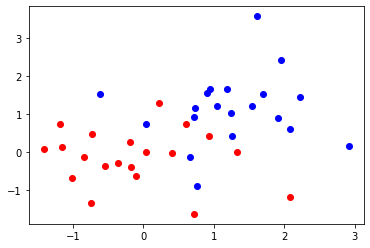

In [219]:
def bivariatefig():
    """making a figure of Bivariate data"""
    (points,outcomes)=generate_synth_data(n)
    plt.figure()
    plt.plot(points[:n,0],points[:n,1],"ro")
    plt.plot(points[n:,0],points[n:,1],"bo")

    plt.savefig("bivariate.pdf")


In [176]:
def make_prediction_grid(predictors,outcomes,limits,h,k): 
    """this function will run through all of the points on our prediction grid 
       and will predict the class label corresponding to that point."""
    
    (x_min,x_max,y_min,y_max)= limits
    xs=np.arange(x_min,x_max)
    ys=np.arange(y_min,y_max)
    xx,yy= np.meshgrid(xs,ys)
    prediction_grid=np.zeros(xx.shape, dtype=int)
    for i,x in enumerate(xs):
        for j,y in enumerate(ys):
            p=np.array(x,y)
            prediction_grid[j,i]=knn_predict(p,predictors,outcomes,k)# Y values on the Rows and X values on Coloumns
    return (xx,yy,prediction_grid)        
            
    

In [177]:
def plot_prediction_grid (xx, yy, prediction_grid, filename):
    """ Plot KNN predictions for every point on the grid."""
    
    from matplotlib.colors import ListedColormap
    background_colormap = ListedColormap (["hotpink","lightskyblue", "yellowgreen"])
    observation_colormap = ListedColormap (["red","blue","green"])
    plt.figure(figsize =(10,10))
    plt.pcolormesh(xx, yy, prediction_grid, cmap = background_colormap, alpha = 0.5)
    plt.scatter(predictors[:,0], predictors [:,1], c = outcomes, cmap = observation_colormap, s = 50)
    plt.xlabel('Variable 1'); plt.ylabel('Variable 2')
    plt.xticks(()); plt.yticks(())
    plt.xlim (np.min(xx), np.max(xx))
    plt.ylim (np.min(yy), np.max(yy))
    plt.savefig(filename)

In [179]:
def test_knn():
    """ It seems that we might be able to find a value of k that maximizes
        the accuracy of the predictions.
        But that's somewhat short sighted.
        This is because what we really care about is not
        how well your method performs on the training data set,
        the data set we've used so far.
        But rather how well it performs on a future dataset you haven't yet seen.
        It turns out that using a value for k that's too large or too small
        is not optimal.
        A phenomenon that is known as the bias-variance tradeoff.
        This suggests that some intermediate values of k might be best."""
    limits=(-3,4,-3,4);k=50; h=0.1
    filename="knn_synth_50.pdf"
    (predictors,outcomes)=generate_synth_data()
    (xx,yy,prediction_grid) =make_prediction_grid(predictors,outcomes,limits,h,k)
    plot_prediction_grid (xx, yy, prediction_grid, filename)
    

<ipython-input-177-2eee30ffb4eb>:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, prediction_grid, cmap = background_colormap, alpha = 0.5)


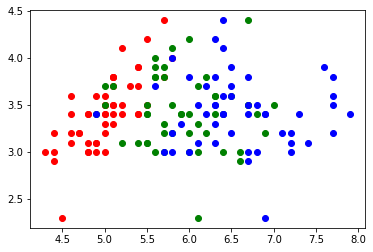

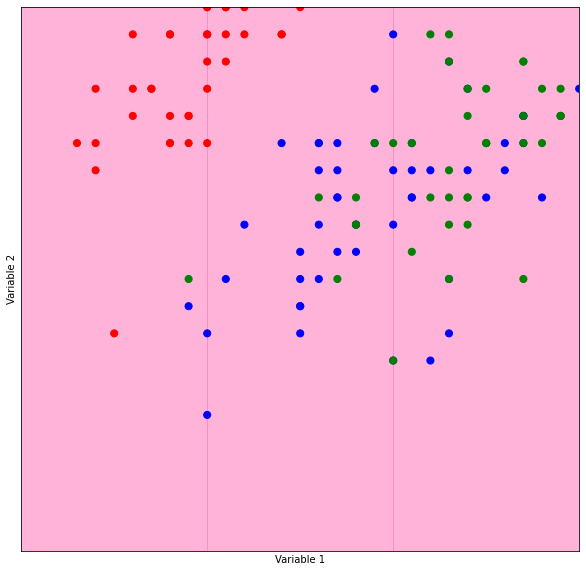

In [189]:
"""We'll be applying both the SciKitLearn and our homemade classifier
to a classic data set created by Ron Fisher in 1933."""
from sklearn import datasets
iris=datasets.load_iris()
predictors=iris.data[:,0:2]
outcomes=iris.target
plt.plot(predictors[outcomes==0][:,0], predictors[outcomes==0][:,1],"ro")
plt.plot(predictors[outcomes==1][:,0], predictors[outcomes==0][:,1],"go")
plt.plot(predictors[outcomes==2][:,0], predictors[outcomes==0][:,1],"bo")
plt.savefig("iris.pdf")
k=5;filename="iris_grid.pdf";limits=(4,8,1.5,4.5); h=0.1
(xx,yy,prediction_grid) =make_prediction_grid(predictors,outcomes,limits,h,k)
plot_prediction_grid (xx, yy, prediction_grid, filename)
"""And these are our iris prediction grid.
In this case, we can see that the grid consists of three different colors
because we have three different classes of observations.
Looking at this grid, if we were to observe a new data point that
sits somewhere in the upper left corner, this classifier
would predict that observation to belong to the red class.
Similarly, if we had a new observation that
happened to sit in the lower left corner of the plot,
that would be classified as a blue dot.
Finally, if we had new observations for which the x-coordinate is
very close to the right boundary of our region here,
those points would be classified as belonging
to the green category or class."""

In [221]:
"""Let's then fit the knn classifier using both the algorithm from SciKitLearn
as well as our own homemade algorithm."""

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(predictors,outcomes)
sk_predictions=knn.predict(predictors)
#data points correspond to their predictions provided by the SciKitLearn algorithm using KNearestNeighbors.

data_points=sk_predictions

#Building array that consist of my predictions

my_predictions=np.array([knn_predict(p,predictors,outcomes,5) for p in predictors])

#Comparing how sk prediction agree my predictions

print('How SciKit Prediction agree my predictions=',100*np.mean(sk_predictions==my_predictions))

#How frequently do my predictions and SciKit predictions agree with the actual observed outcomes.

print('How frequently do my Predictions agree with the actual observed outcomes=',100*np.mean(sk_predictions==outcomes))
print('How frequently do SciKit Predictions agree with the actual observed outcomes=',100*np.mean(my_predictions==outcomes))


How SciKit Prediction agree my predictions= 96.0
How frequently do my Predictions agree with the actual observed outcomes= 83.33333333333334
How frequently do SciKit Predictions agree with the actual observed outcomes= 84.66666666666667
